### Sprint 2 - 2019-2024 US Stock Market Data

DS4003 | Spring 2024



This dataset is a comprehensive aggregation of financial market data spanning a five-year period, meticulously capturing the fluctuations in prices and trading volumes of a diversified set of assets. It encompasses a broad spectrum of sectors, ranging from energy commodities such as natural gas and crude oil, to a variety of metals including copper, platinum, silver, and gold. Additionally, it features data on prominent cryptocurrencies like Bitcoin and Ethereum, providing insights into the burgeoning digital currency market.

Beyond commodities and cryptocurrencies, the dataset includes information on major stock indices like the S&P 500 and Nasdaq 100, as well as individual stocks from leading companies such as Apple, Tesla, Microsoft, Google, Nvidia, Berkshire Hathaway, Netflix, Amazon, and Meta Platforms (formerly Facebook). This selection offers a window into the performance of key players across various industries, from technology and entertainment to finance and automotive.


**Why Use This Data?**
- Market Insights: It offers a holistic view of the financial markets, enabling users to draw connections between different sectors and asset classes.
- Trend Analysis: The time series data allows for an in-depth analysis of short-term and long-term trends, market cycles, and volatility patterns.
- Investment Strategy Development: By examining correlations and fluctuations across various sectors, investors and analysts can identify potential investment opportunities and risks.
- Educational Value: For those learning about financial markets, this dataset serves as a practical tool for understanding market dynamics and the impact of global events on asset prices.
- Custom Analysis: The diversity of the dataset supports customized analyses, catering to specific interests or hypotheses about market behavior.

**Data Provenance**

- The dataset was compiled and made available on Kaggle by SAKET KUMAR. (https://www.kaggle.com/datasets/saketk511/2019-2024-us-stock-market-data/data)
- SOURCES: Investing.com
- COLLECTION METHODOLOGY
Google Search

**Data Cleaning**


In [46]:
# import dependencies
import pandas as pd
import plotly.express as px
from dash import Dash, dcc, html, Input, Output
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('data.csv')

# Display the first few rows of the dataset
df.head()


,Unnamed: 0,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,Platinum_Vol.,Ethereum_Price,Ethereum_Vol.,S&P_500_Price,Nasdaq_100_Price,Nasdaq_100_Vol.,Apple_Price,Apple_Vol.,Tesla_Price,Tesla_Vol.,Microsoft_Price,Microsoft_Vol.,Silver_Price,Silver_Vol.,Google_Price,Google_Vol.,Nvidia_Price,Nvidia_Vol.,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,0,02-02-2024,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,901.6,NaN,"2,309.28",246890.0,"4,958.61","17,642.73",315620000.0,185.85,102550000.0,187.91,110610000.0,411.22,28260000.0,22.796,NaN,142.38,62500000.0,661.60,47660000.0,"5,89,498",10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,"2,053.70",NaN
1,1,01-02-2024,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690.0,922.3,NaN,"2,304.28",323610.0,"4,906.19","17,344.71",240640000.0,186.86,53490000.0,188.86,90680000.0,403.78,29230000.0,23.236,85160.0,141.16,37120000.0,630.27,36020000.0,"5,81,600",9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,"2,071.10",260920.0
2,2,31-01-2024,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480.0,932.6,NaN,"2,283.14",408790.0,"4,848.87","17,137.24",366450000.0,184.40,54830000.0,187.29,102270000.0,397.58,46780000.0,23.169,66910.0,140.10,71370000.0,615.27,45070000.0,"5,78,020",9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,"2,067.40",238370.0
3,3,30-01-2024,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130.0,931.7,NaN,"2,343.11",387120.0,"4,924.97","17,476.71",236210000.0,188.04,55270000.0,191.59,105540000.0,408.59,29340000.0,23.225,53370.0,151.46,33060000.0,627.74,39600000.0,"5,84,680",9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,"2,050.90",214590.0
4,4,29-01-2024,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230.0,938.3,NaN,"2,317.79",318840.0,"4,927.93","17,596.27",238750000.0,191.73,46890000.0,190.93,123600000.0,409.72,23290000.0,23.134,330.0,153.51,27590000.0,624.65,33900000.0,"5,78,800",13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,"2,034.90",1780.0


In [47]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Convert string columns with commas to float for specific financial metrics
columns_to_convert = ['Bitcoin_Price','S&P_500_Price', 'Ethereum_Price','Platinum_Price','Nasdaq_100_Price','Berkshire_Price', 'Gold_Price']
for col in columns_to_convert:
    if col in df.columns:
        df[col] = df[col].str.replace(',', '').astype(float)

# Normalize column names by making them lowercase and replacing spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('.', '')

# Forward fill missing values for columns with fewer missing data
columns_to_ffill = ['natural_gas_vol', 'crude_oil_vol', 'copper_vol', 'gold_vol', 'nasdaq_100_vol']
df[columns_to_ffill] = df[columns_to_ffill].fillna(method='ffill')

# Forward fill missing values for columns with fewer missing data
columns_to_ffill = ['natural_gas_vol', 'crude_oil_vol', 'copper_vol', 'gold_vol', 'nasdaq_100_vol', 'ethereum_vol', 'silver_vol']
df[columns_to_ffill] = df[columns_to_ffill].fillna(method='ffill')

df.fillna(method='bfill', inplace=True)

# Remove unnecessary 'Unnamed:_0' column if it exists
if 'unnamed:_0' in df.columns:
    df.drop(columns=['unnamed:_0'], inplace=True)

# Display the cleaned data's first few rows
df.head()


,date,natural_gas_price,natural_gas_vol,crude_oil_price,crude_oil_vol,copper_price,copper_vol,bitcoin_price,bitcoin_vol,platinum_price,platinum_vol,ethereum_price,ethereum_vol,s&p_500_price,nasdaq_100_price,nasdaq_100_vol,apple_price,apple_vol,tesla_price,tesla_vol,microsoft_price,microsoft_vol,silver_price,silver_vol,google_price,google_vol,nvidia_price,nvidia_vol,berkshire_price,berkshire_vol,netflix_price,netflix_vol,amazon_price,amazon_vol,meta_price,meta_vol,gold_price,gold_vol
0,2024-02-02,2.079,161340.0,72.28,577940.0,3.8215,38000.0,43194.7,42650.0,901.6,18530.0,2309.28,246890.0,4958.61,17642.73,315620000.0,185.85,102550000.0,187.91,110610000.0,411.22,28260000.0,22.796,85160.0,142.38,62500000.0,661.60,47660000.0,589498.0,10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,2053.7,260920.0
1,2024-02-01,2.050,161340.0,73.82,577940.0,3.8535,38000.0,43081.4,47690.0,922.3,18530.0,2304.28,323610.0,4906.19,17344.71,240640000.0,186.86,53490000.0,188.86,90680000.0,403.78,29230000.0,23.236,85160.0,141.16,37120000.0,630.27,36020000.0,581600.0,9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,2071.1,260920.0
2,2024-01-31,2.100,142860.0,75.85,344490.0,3.9060,38000.0,42580.5,56480.0,932.6,18530.0,2283.14,408790.0,4848.87,17137.24,366450000.0,184.40,54830000.0,187.29,102270000.0,397.58,46780000.0,23.169,66910.0,140.10,71370000.0,615.27,45070000.0,578020.0,9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,2067.4,238370.0
3,2024-01-30,2.077,139750.0,77.82,347240.0,3.9110,38000.0,42946.2,55130.0,931.7,18530.0,2343.11,387120.0,4924.97,17476.71,236210000.0,188.04,55270000.0,191.59,105540000.0,408.59,29340000.0,23.225,53370.0,151.46,33060000.0,627.74,39600000.0,584680.0,9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,2050.9,214590.0
4,2024-01-29,2.490,3590.0,76.78,331930.0,3.8790,38000.0,43299.8,45230.0,938.3,18530.0,2317.79,318840.0,4927.93,17596.27,238750000.0,191.73,46890000.0,190.93,123600000.0,409.72,23290000.0,23.134,330.0,153.51,27590000.0,624.65,33900000.0,578800.0,13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,2034.9,1780.0


**EDA**

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Number of Observations
print(f"Number of observations: {len(df)}")

Number of observations: 1243


In [53]:
#2. Unique Categories 
# Count unique values in each column
unique_counts = df.nunique()

# Display the counts
print("Unique values in each column:\n", unique_counts)

Unique values in each column:
 date                 1243
natural_gas_price    1003
natural_gas_vol      1206
crude_oil_price      1142
crude_oil_vol        1196
copper_price         1060
copper_vol            766
bitcoin_price        1238
bitcoin_vol          1203
platinum_price       1095
platinum_vol          489
ethereum_price       1231
ethereum_vol         1081
s&p_500_price        1241
nasdaq_100_price     1243
nasdaq_100_vol       1200
apple_price          1178
apple_vol            1170
tesla_price          1195
tesla_vol            1191
microsoft_price      1209
microsoft_vol        1028
silver_price         1167
silver_vol           1074
google_price         1153
google_vol           1047
nvidia_price         1211
nvidia_vol           1133
berkshire_price      1208
berkshire_vol         525
netflix_price        1224
netflix_vol           734
amazon_price         1144
amazon_vol           1148
meta_price           1211
meta_vol             1017
gold_price           1122
gold_vo

In [50]:
# 3. Missing Data
missing_data = df.isnull().sum()
print("Missing data per variable:\n", missing_data[missing_data > 0])

Missing data per variable:
 platinum_vol    375
dtype: int64


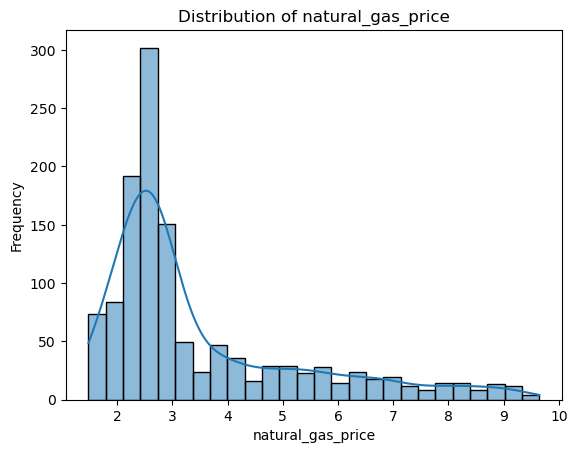

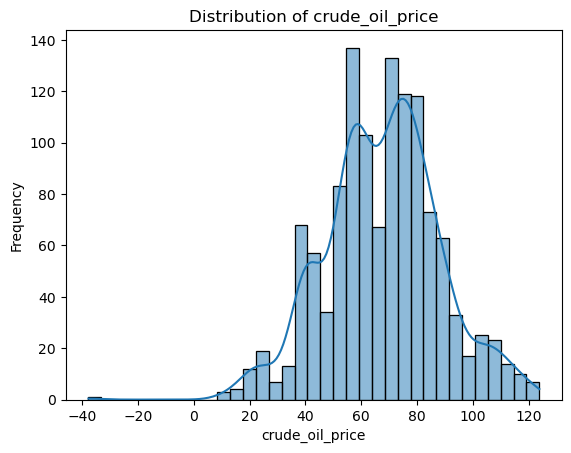

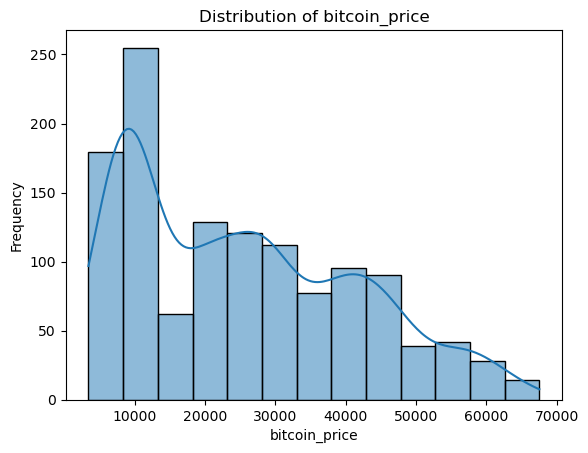

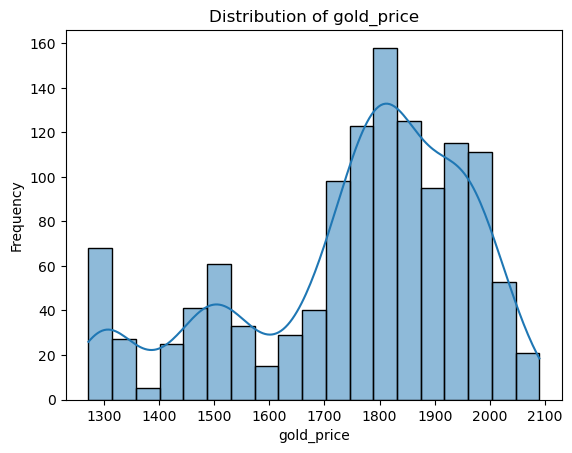

In [54]:

# 4. Distributions of Continuous Variables
# Histograms for continuous variables
continuous_columns = ['natural_gas_price', 'crude_oil_price', 'bitcoin_price', 'gold_price']  # Add more as needed
for column in continuous_columns:
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

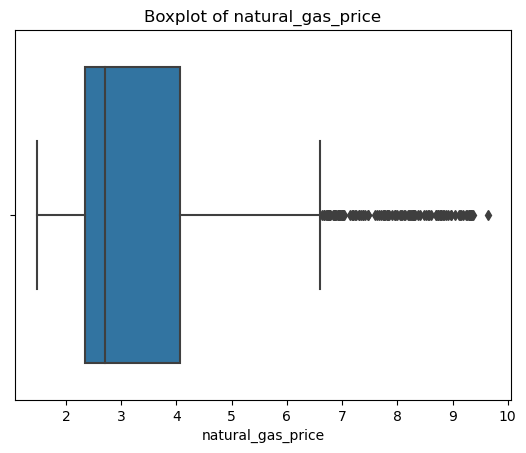

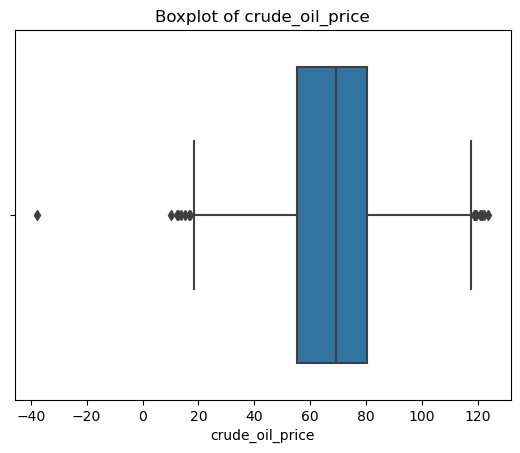

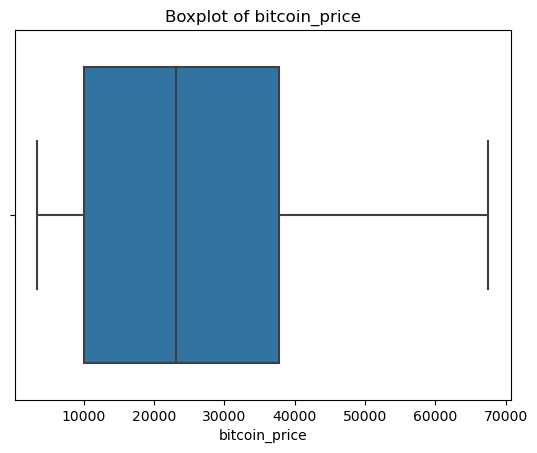

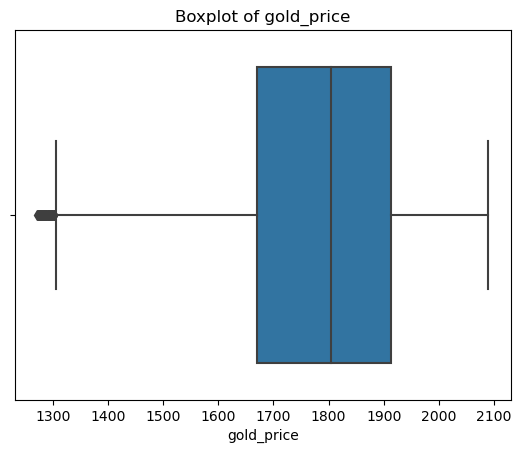

In [55]:
# Boxplots to identify outliers
for column in continuous_columns:
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

**Data Dictionary**

In [59]:
# Initialize an empty DataFrame for the data dictionary
data_dictionary = pd.DataFrame()

# Populate the data dictionary
data_dictionary['Column'] = df.columns
data_dictionary['Data Type'] = [df[col].dtype for col in df.columns]
data_dictionary['Unique Values'] = df.nunique().values
# Placeholder for descriptions - to be filled in manually
data_dictionary['Description'] = ['' for _ in df.columns]

# Display the initial data dictionary
print(data_dictionary)

               Column       Data Type  Unique Values Description
0                date  datetime64[ns]           1243            
1   natural_gas_price         float64           1003            
2     natural_gas_vol         float64           1206            
3     crude_oil_price         float64           1142            
4       crude_oil_vol         float64           1196            
5        copper_price         float64           1060            
6          copper_vol         float64            766            
7       bitcoin_price         float64           1238            
8         bitcoin_vol         float64           1203            
9      platinum_price         float64           1095            
10       platinum_vol         float64            489            
11     ethereum_price         float64           1231            
12       ethereum_vol         float64           1081            
13      s&p_500_price         float64           1241            
14   nasdaq_100_price    


**UI Component**

- Date Range Selector: Allows users to select start and end dates to filter the data displayed on the dashboard. This is particularly useful for time-series data to examine trends over specific periods.

- Dropdown Menus for Selecting Commodities/Stocks: Provide dropdown menus that allow users to select which commodities, cryptocurrencies, or stocks they want to view data for. This could include multi-select capabilities for comparative analyses.

- Search Bar: Implement a search bar for users to quickly find and focus on specific data points, such as a particular stock or commodity.

- Interactive Legends: Use legends that users can interact with, such as clicking on a legend item to hide or show the corresponding data in the visualization.

- Data Filtering Options: Besides date and dropdown selections, offer additional filters based on volume, price thresholds, or categories (e.g., metals, energy, tech stocks).

- Dynamic Data Tables: Display data in table format, where users can sort columns based on their interests, such as sorting by the highest or lowest price, volume, or percentage change.


**Data Visulization**

- Time Series Line Charts: Display the price movements of selected commodities, stocks, or cryptocurrencies over time. Enhance this with a brush for zooming and panning through time.

- Volume and Price Scatter Plot: Create a scatter plot comparing trading volume to price changes for a selected period. This could highlight trading activity relative to price movements.

- Correlation Heatmaps: Show a heatmap of correlations between the prices of different commodities and stocks. This can help users identify how closely different assets move in relation to each other.

- Candlestick Charts for Stock Analysis: Use candlestick charts to provide detailed insights into stock price movements over time, offering a more nuanced view than simple line charts.

- Comparative Bar Charts: Design bar charts that compare the average prices or volume of selected commodities or stocks over a chosen period. Users could select which entities to compare using dropdown menus.

- Dynamic Histograms or Distribution Plots: Visualize the distribution of prices or volumes for a selected commodity or stock, allowing users to understand the variability and central tendency over time or at a specific snapshot.